In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

from acquire import get_full_sales_data, get_opsd_data, refresh_data

In [ ]:
refresh_data('all')

In [2]:
df = get_full_sales_data()

In [3]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'

#pd.to_datetime('now').strftime(fmt)
df.sale_date = pd.to_datetime(df.sale_date, format=fmt)

In [4]:
df = df.sort_values(by = 'sale_date').set_index('sale_date')

In [5]:
df.sale_amount.plot()

In [6]:
df['month'] = df.index.strftime('%m-%b')
df['weekday'] = df.index.strftime('%w-%a')
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue


In [7]:
df.sale_amount = df.sale_amount.astype('int')

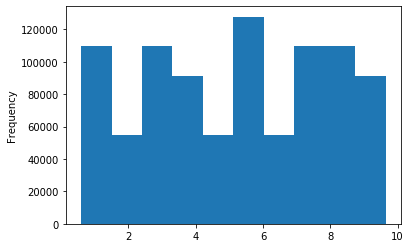

In [8]:
df.item_price.plot.hist()

In [9]:
df['sales_total'] = df.sale_amount * df.item_price

In [10]:
sales_by_day = df.resample('d')[['sales_total']].sum()
sales_by_day

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85
2013-01-06 00:00:00+00:00,93093.85
2013-01-07 00:00:00+00:00,63777.54
2013-01-08 00:00:00+00:00,72994.66
2013-01-09 00:00:00+00:00,75133.92


In [11]:
sales_by_day['last_total'] = sales_by_day.sales_total.diff()
sales_by_day

,sales_total,last_total
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12
2013-01-06 00:00:00+00:00,93093.85,5472.00
2013-01-07 00:00:00+00:00,63777.54,-29316.31
2013-01-08 00:00:00+00:00,72994.66,9217.12
2013-01-09 00:00:00+00:00,75133.92,2139.26


,sales_total,last_total,delta
sale_date,,,
2013-01-01 00:00:00+00:00,73844.01,NaN,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43,73844.01
2013-01-03 00:00:00+00:00,78169.48,4598.90,73570.58
2013-01-04 00:00:00+00:00,84467.73,6298.25,78169.48
2013-01-05 00:00:00+00:00,87621.85,3154.12,84467.73
2013-01-06 00:00:00+00:00,93093.85,5472.00,87621.85
2013-01-07 00:00:00+00:00,63777.54,-29316.31,93093.85
2013-01-08 00:00:00+00:00,72994.66,9217.12,63777.54
2013-01-09 00:00:00+00:00,75133.92,2139.26,72994.66


In [ ]:
def prep_store_data(df):
    #parse date column and set index
    fmt = '%a, %d %b %Y %H:%M:%S %Z'
    df.sale_date = pd.to_datetime(df.sale_date, format=fmt)
    df = df.sort_values(by = 'sale_date').set_index('sale_date')
    
    #add components
    df['month'] = df.index.strftime('%m-%b')
    df['weekday'] = df.index.strftime('%w-%a')
    
    #find change in total
    df.sale_amount = df.sale_amount.astype('int')
    sales_by_day = df.resample('d')[['sales_total']].sum()
    sales_by_day['last_total'] = sales_by_day.sales_total.diff()
    
    return df
